<h1><center>MOPSO</center></h1>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from platypus import NSGAII, Problem, Real
from sklearn.metrics.pairwise import euclidean_distances

In [21]:
d1 = pd.read_csv('./points.csv')
d2 = pd.read_csv('./edges.csv')

In [25]:
m1 = 'Original Plot'
m2 = 'MDS Plot'
m3 = 'PSO Plot'
def graph(d1,d2,m):
    x_val = d1["x1"].values
    y_val = d1["x2"].values
    print(d2)
    link = d2.values.T
    print(link)
    plt.plot(x_val[link], y_val[link], 'g-') # Edges
    low1 = 0 if d1["x1"].min()>0 else d1["x1"].min()-3
    low2 = 0 if d1["x2"].min()>0 else d1["x2"].min()-3
    plt.axis([low1,d1["x1"].max()+3,low2,d1["x2"].max()+3])
    plt.plot(d1["x1"],d1["x2"],'ro')
    plt.title(m)
    plt.savefig('./output/plot1.png', bbox_inches='tight')
    plt.show()
    #plt.savefig('plt1.png')

In [26]:
def number_of_intersection(x,y):
    pts = []
    for i in range(0,len(x)):
        pts.append(Point(x[i], y[i]))

    x1 = d2["node1"].values
    y1 = d2["node2"].values

    count = 0
    for i in range(0, len(x1)):
        for j in range(i+1, len(y1)):
            if intersect(pts[x1[i]], pts[y1[i]], pts[x1[j]], pts[y1[j]]):
                count = count + 1
    return count

<h2>MDS</h2>

    node1  node2
0       0      1
1       0      3
2       1      2
3       2      3
4       4      5
5       6      7
6       7      1
7       4      9
8       5      2
9       1      8
10     10     11
11     10      8
12      5      3
13      4      9
14      6      2
[[ 0  0  1  2  4  6  7  4  5  1 10 10  5  4  6]
 [ 1  3  2  3  5  7  1  9  2  8 11  8  3  9  2]]


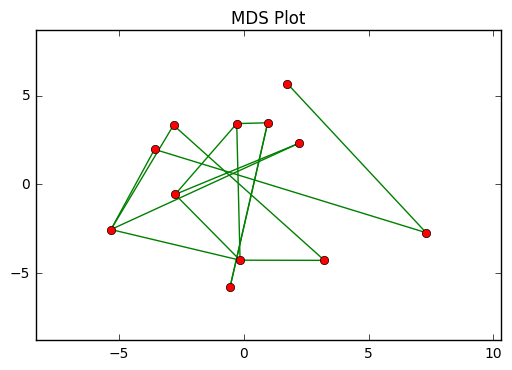

NameError: name 'Point' is not defined

In [27]:
mds = MDS(n_components=2)
dat = pd.DataFrame(mds.fit(d1).embedding_,columns=["x1","x2"])
graph(dat,d2,m2)
dij = euclidean_distances(d1.values, d1.values)
dis2 = euclidean_distances(dat.values, dat.values)
mds_stress = (np.sum((dij-dis2)**2))**0.5   
mds_inter= number_of_intersection(dat["x1"],dat["x2"])
print(mds_stress,"   ",mds_inter)

<h2>MOPSO</h2>

In [78]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y

def ccw(A,B,C):
    val = (C.y-A.y)*(B.x-A.x) - (B.y-A.y)*(C.x-A.x)
    if val == 0:
       # print "val=0"
        return 0
    if val > 0:
        return 1
    return 2

def intersect(A,B,C,D):
    if A == C or B == C or A == D or B == D:
        return False
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

In [80]:
dij = euclidean_distances(d1.values, d1.values)
den = np.sum(dij**2)

def objective(x):
    twoD = np.reshape(x, (-1, 2))
    dis = euclidean_distances(twoD, twoD)  
    stress = (np.sum((dij-dis)**2))**0.5 
    inter= number_of_intersection(x[0:][::2],x[1:][::2])
    return [stress,inter]
    

In [102]:
problem = Problem(len(d1)*2, 2)
problem.types[:] = Real(-10, 10)
problem.function = objective

algorithm = NSGAII(problem,population_size=50)
algorithm.run(20000)
result = algorithm.result

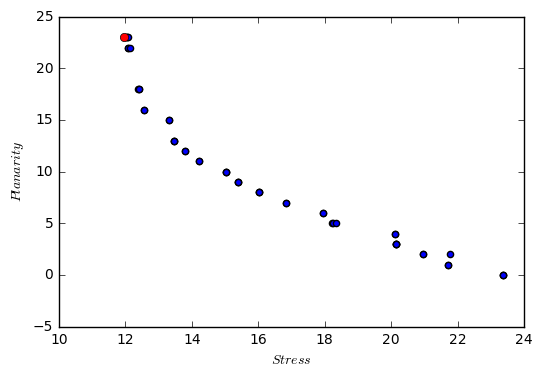

In [103]:
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
plt.plot(mds_stress,mds_inter, 'ro')
#plt.xlim([0, 1.1])
#plt.ylim([0, 1.1])
plt.xlabel("$Stress$")
plt.ylabel("$Planarity$")
plt.show()

In [56]:
count = 0
out = {}
for solution in algorithm.result:
    out[solution.objectives] = solution.variables
    count += 1
print(count)

100


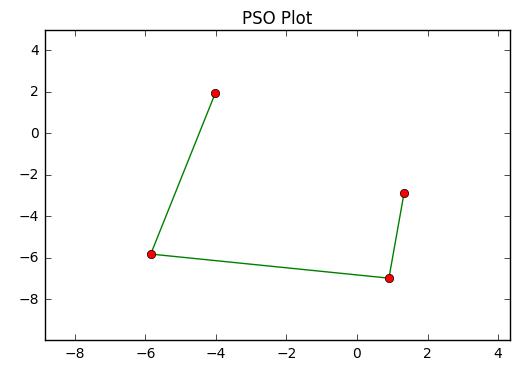

In [60]:
sample = out[result[0].objectives]
x = sample[0:][::2]
y = sample[1:][::2]
newD = pd.DataFrame({"x1":x,"x2":y})
graph(newD,d2,m3)

<center><h2>Metro Data</h2></center>

Let's first try to process both files as they are not directly readable

In [5]:
fname = './Metro_Data/metric_data.csv'
with open(fname) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip().split(";") for x in content] 

In [12]:
df = pd.DataFrame(content[1:], columns=content[0])
df.to_csv("metric_data.csv",index=False)

In [15]:
fname = './Metro_Data/fixation_data.csv'
with open(fname) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip().split("\t") for x in content] 
df = pd.DataFrame(content[1:], columns=content[0])
df.to_csv("fixation_data.csv",index=False)

In [16]:
df.head()

,Timestamp,StimuliName,FixationIndex,FixationDuration,MappedFixationPointX,MappedFixationPointY,user,description
0,2586,01_Antwerpen_S1.jpg,9,250,1151,458,p1,color
1,2836,01_Antwerpen_S1.jpg,10,150,1371,316,p1,color
2,2986,01_Antwerpen_S1.jpg,11,283,1342,287,p1,color
3,3269,01_Antwerpen_S1.jpg,12,433,762,303,p1,color
4,3702,01_Antwerpen_S1.jpg,13,183,624,297,p1,color


Now we can directly read these data frame